### Drug Target Analysis from Klaeger et al. Science 2017 established drug targets

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from tools import networkHelpers as nh
%matplotlib inline

In [2]:
dat = pd.read_excel('../data/Klaeger_Science_2017 Supplementary Table 2 Target Lists.xlsx', sheet_name='Kinobeads')

columns = dat.columns
display(columns)

dat.head()

Index(['Drug', 'Lysate', 'Beads', 'Gene Name', 'Relative Intensity DMSO',
       'Relative Intensity 3 nM', 'Relative Intensity 10 nM',
       'Relative Intensity 30 nM', 'Relative Intensity 100 nM',
       'Relative Intensity 300 nM', 'Relative Intensity 1000 nM',
       'Relative Intensity 3000 nM', 'Relative Intensity 30000 nM',
       'DMSO Intensity', 'Intensity Type', 'Slope', 'Bottom', 'Top',
       'Inflection', 'EC50', 'EC50 Standard Error', 'Correction Factor',
       'Apparent Kd', 'R2', 'BIC', 'Target Classification'],
      dtype='object')

,Drug,Lysate,Beads,Gene Name,Relative Intensity DMSO,Relative Intensity 3 nM,Relative Intensity 10 nM,Relative Intensity 30 nM,Relative Intensity 100 nM,Relative Intensity 300 nM,...,Bottom,Top,Inflection,EC50,EC50 Standard Error,Correction Factor,Apparent Kd,R2,BIC,Target Classification
0,Abemaciclib,4 cell line mix,Kinobeads,AAK1,1,0.905556,0.791054,0.738292,0.639565,0.323354,...,0.009092,0.957905,151.288760,151.288760,45.696999,0.673073,101.828368,0.985386,-20.503519,High confidence
1,Abemaciclib,4 cell line mix,Kinobeads,ADCK1,1,1.045974,0.869866,1.141565,0.000000,0.000000,...,-0.001200,1.014355,63.935536,63.935536,68.832970,0.622595,39.805937,0.983520,-12.606135,High confidence
2,Abemaciclib,4 cell line mix,Kinobeads,BMP2K,1,1.101696,1.012297,1.087891,0.973740,0.863230,...,-1.003278,1.034558,84774.108960,84774.108960,217756.243215,0.660952,56031.642989,0.937247,-15.330485,High confidence
3,Abemaciclib,4 cell line mix,Kinobeads,CAMK2D,1,0.894551,0.984481,0.900583,0.440384,0.178266,...,0.018690,0.972850,95.373379,95.373379,12.131433,0.203913,19.447883,0.992088,-22.486948,High confidence
4,Abemaciclib,4 cell line mix,Kinobeads,CAMK2G,1,1.125435,1.565245,1.236451,0.315507,0.139777,...,0.043265,1.232332,82.363844,82.363844,NaN,0.217204,17.889794,0.939239,1.734623,High confidence


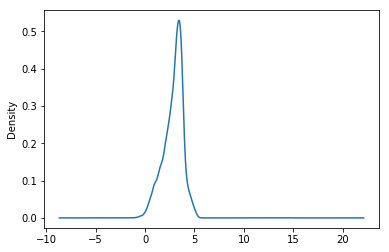

In [3]:
kd_log = dat['Apparent Kd'].apply(lambda x: np.log(x))
std = kd_log.std()
(kd_log/std).plot.kde()

In [4]:
cols_to_keep = ['Drug', 'Gene Name', 'R2', 'Target Classification']
dat = dat[cols_to_keep]
dat.head()

,Drug,Gene Name,R2,Target Classification
0,Abemaciclib,AAK1,0.985386,High confidence
1,Abemaciclib,ADCK1,0.983520,High confidence
2,Abemaciclib,BMP2K,0.937247,High confidence
3,Abemaciclib,CAMK2D,0.992088,High confidence
4,Abemaciclib,CAMK2G,0.939239,High confidence


In [5]:
double_drug_targets = dat[dat['Gene Name'].apply(lambda x: ';' in x)]
#double_drug_targets.shape

first_genes = double_drug_targets['Gene Name'].apply(lambda x: x.split(';')[0])
second_genes = double_drug_targets['Gene Name'].apply(lambda x: x.split(';')[1])

repaired_double_targets = double_drug_targets.drop('Gene Name', axis=1).assign(**{'Gene Name':first_genes})
repaired_double_targets = repaired_double_targets.append(double_drug_targets.drop('Gene Name', axis=1).assign(**{'Gene Name':second_genes})) 
repaired_double_targets = repaired_double_targets[cols_to_keep]

dat = dat.drop(double_drug_targets.index).append(repaired_double_targets)
dat.head()

,Drug,Gene Name,R2,Target Classification
0,Abemaciclib,AAK1,0.985386,High confidence
1,Abemaciclib,ADCK1,0.983520,High confidence
2,Abemaciclib,BMP2K,0.937247,High confidence
3,Abemaciclib,CAMK2D,0.992088,High confidence
4,Abemaciclib,CAMK2G,0.939239,High confidence


In [6]:
genes_targeted = pd.unique(dat['Gene Name'])
len(genes_targeted)

531

In [7]:
louvain_tier1 = pd.read_csv('../results/weighted/louvain_clusters.txt', sep='\t')
len(set(louvain_tier1['names']) & set(genes_targeted))

244

In [8]:
kmast = pd.read_excel('../data/KINASESmasterlist_w_Aliases.xlsx')
kmast.head()

,Uniprot Protein,MS Gene,RNAseq Gene,RNAseq Accession,Family,Mouse Uniprot Protein,Mouse RNAseq gene,Mouse RNAseq Accession,Kinome Render Tree Name,Aliases (Conservative),...,Aliases,description,other_designations,Entrez_Symbol,Old_Name,Entrez_Synonyms,Entrez_other_designations,Unnamed: 18,Gene Symbol,Gene Symbol and Synonyms
0,AAK1,AAK1,AAK1,22848.0,Other,Aak1,Aak1,269774,AAK1,"AAK1,",...,NaN,AP2 associated kinase 1,adaptor-associated kinase 1,AAK1,AAK1,KIAA1048|MGC138170,adaptor-associated kinase 1,NaN,AAK1,AAK1
1,AAPK1,PRKAA1,PRKAA1,5562.0,CAMK,Aapk1,Prkaa1,105787,AMPK[alpha]1,"PRKAA1, AMPKa1",...,"AMPK, AMPKa1","protein kinase, AMP-activated, alpha 1 catalyt...","5'-AMP-activated protein kinase, catalytic alp...",PRKAA1,AMPKa1,AMPK|AMPKa1|MGC33776|MGC57364,"5'-AMP-activated protein kinase, catalytic alp...",NaN,PRKAA1,"AMPK, PRKAA1, AMPKa1"
2,AAPK2,PRKAA2,PRKAA2,5563.0,CAMK,Aapk2,Prkaa2,108079,AMPK[alpha]2,"PRKAA2, AMPK2, AMPKa2, PRKAA",...,"AMPK, AMPK2, AMPKa2, PRKAA","protein kinase, AMP-activated, alpha 2 catalyt...","5'-AMP-activated protein kinase, catalytic alp...",PRKAA2,AMPKa2,AMPK|AMPK2|PRKAA,"5'-AMP-activated protein kinase, catalytic alp...",NaN,PRKAA2,"AMPK2, AMPK, PRKAA, AMPKa2, PRKAA2"
3,ABL1,ABL1,ABL1,25.0,TK,Abl1,Abl1,11350,Abl,"ABL1,ABL, JTK7, bcr/abl, c-ABL, c-ABL1, v-abl",...,"ABL, JTK7, bcr/abl, c-ABL, c-ABL1, p150, v-abl","ABL proto-oncogene 1, non-receptor tyrosine ki...",Abelson tyrosine-protein kinase 1|bcr/c-abl on...,ABL1,ABL,ABL|JTK7|c-ABL|p150|v-abl,Abelson murine leukemia viral (v-abl) oncogene...,NaN,ABL1,"c-ABL1, p150, ABL, JTK7, v-abl, bcr/abl, c-ABL..."
4,ABL2,ABL2,ABL2,27.0,TK,Abl2,Abl2,11352,Arg,"ABL2,ABLL, ARG",...,"ABLL, ARG","ABL proto-oncogene 2, non-receptor tyrosine ki...","abelson-related gene protein|c-abl oncogene 2,...",ABL2,ARG,ABLL|ARG,Abelson murine leukemia viral (v-abl) oncogene...,NaN,ABL2,"ABL2, ABLL, ARG"


In [9]:
best_col = 'Uniprot Protein'
best_num = len(set(kmast[best_col]) & set(louvain_tier1['names']))
for c in kmast.columns:
    temp_set = set(kmast[c])
    temp_len = len(set(kmast[c]) & set(louvain_tier1['names']))
    if temp_len > best_num:
        best_col = c
        best_num = temp_len
        
print(best_col, best_num)

MS Gene 507


In [10]:
best_col = 'Uniprot Protein'
best_num = len(set(kmast[best_col]) & set(genes_targeted))
for c in kmast.columns:
    temp_set = set(kmast[c])
    temp_len = len(set(kmast[c]) & set(genes_targeted))
    if temp_len > best_num:
        best_col = c
        best_num = temp_len
        
print(best_col, best_num)

MS Gene 249


In [11]:
from collections import Counter

MS_to_RNAseq_mapper = kmast.set_index('MS Gene')['RNAseq Gene'].to_dict()
targeted_kinases = list(map(lambda x: MS_to_RNAseq_mapper[x], list(set(kmast[best_col]) & set(genes_targeted))))
len(targeted_kinases)

249

In [12]:
raw_counts_klaeger = Counter(dat['Gene Name'])

targeted_kinase_counts = {MS_to_RNAseq_mapper[gen]:count for gen,count in raw_counts_klaeger.items() if gen in targeted_kinases}


In [300]:
#pd.Series(targeted_kinase_counts).to_csv('../results/targeted_kinase_counts.csv', sep=',')

### Understudied

In [13]:
understudied = set(pd.read_csv('../data/dark_kinases.csv', header=0)['symbol'])
understudied

{'ADCK1',
 'ADCK2',
 'ADCK5',
 'ALPK2',
 'ALPK3',
 'BCKDK',
 'BRSK1',
 'BRSK2',
 'CAMK1D',
 'CAMK1G',
 'CAMKK1',
 'CAMKK2',
 'CAMKV',
 'CDC42BPA',
 'CDC42BPB',
 'CDC42BPG',
 'CDK10',
 'CDK11A',
 'CDK11B',
 'CDK12',
 'CDK13',
 'CDK14',
 'CDK15',
 'CDK16',
 'CDK17',
 'CDK18',
 'CDK19',
 'CDK20',
 'CDKL1',
 'CDKL2',
 'CDKL3',
 'CDKL4',
 'CDKL5',
 'CLK3',
 'CLK4',
 'COQ8A',
 'COQ8B',
 'CSNK1A1L',
 'CSNK1G1',
 'CSNK1G2',
 'CSNK1G3',
 'CSNK2A2',
 'CSNK2A3',
 'DCLK3',
 'DSTYK',
 'DYRK1B',
 'DYRK2',
 'DYRK3',
 'DYRK4',
 'EEF2K',
 'ERN2',
 'HIPK1',
 'HIPK3',
 'HIPK4',
 'ICK',
 'LMTK2',
 'LMTK3',
 'LRRK1',
 'LTK',
 'MAP3K10',
 'MAP3K14',
 'MAP3K15',
 'MAP3K21',
 'MAPK15',
 'MAPK4',
 'MARK1',
 'MARK3',
 'MARK4',
 'MAST2',
 'MAST3',
 'MAST4',
 'MKNK1',
 'MKNK2',
 'NEK1',
 'NEK10',
 'NEK11',
 'NEK3',
 'NEK4',
 'NEK5',
 'NEK6',
 'NEK7',
 'NEK8',
 'NEK9',
 'NIM1K',
 'NRBP2',
 'NRK',
 'NUAK2',
 'OBSCN',
 'PAK3',
 'PAK5',
 'PAK6',
 'PAN3',
 'PDIK1L',
 'PHKG1',
 'PHKG2',
 'PI4KA',
 'PIK3C2B',
 'PIK3C2G'

In [14]:
under_best_col = 'Uniprot Protein'
best_num = len(set(kmast[under_best_col]) & set(understudied))
for c in kmast.columns:
    temp_set = set(kmast[c])
    temp_len = len(set(kmast[c]) & set(understudied))
    if temp_len > best_num:
        under_best_col = c
        best_num = temp_len
        
print(under_best_col, best_num)

MS Gene 150


In [16]:
present_understudied = list(set(kmast[under_best_col]) & understudied)

In [17]:
louvain_tier2 = pd.read_csv('../results/weighted/louvain_small_clusters.txt', sep='\t')
louvain_tier2.head()

,names,cluster
0,MST1R,11
1,YES1,11
2,TYRO3,11
3,FGR,11
4,SRC,11


In [18]:
louv= louvain_tier1.merge(louvain_tier2.set_index('names'), how='left', on='names', suffixes=['_super', '_sub'])
louv.head()

,names,cluster_super,cluster_sub
0,MST1R,3,11
1,YES1,3,11
2,TYRO3,3,11
3,FGR,3,11
4,SRC,3,11


In [19]:
from copy import copy 
present_understudied = [MS_to_RNAseq_mapper[gen] for gen in present_understudied]
counts_updated = copy(targeted_kinase_counts)
counts_updated.update({gen:0 for gen in louv['names'] if gen not in counts_updated})

louv['understudied'] = louv['names'].isin(present_understudied)*1
louv['target_count'] = louv['names'].apply(lambda x: counts_updated[x])
louv.head()

,names,cluster_super,cluster_sub,understudied,target_count
0,MST1R,3,11,0,18
1,YES1,3,11,0,33
2,TYRO3,3,11,0,0
3,FGR,3,11,0,7
4,SRC,3,11,0,24


In [20]:
louv.head()

,names,cluster_super,cluster_sub,understudied,target_count
0,MST1R,3,11,0,18
1,YES1,3,11,0,33
2,TYRO3,3,11,0,0
3,FGR,3,11,0,7
4,SRC,3,11,0,24


In [21]:
sub_counts = louv.groupby('cluster_sub').count()['names']
sub_counts.columns = ['count']

sub_grouping = louv.groupby('cluster_sub').agg({
    'cluster_super':'mean',
    'understudied':'sum',
    'target_count':'sum'
})
sub_grouping['count'] = sub_counts
#sub_grouping
sub_grouping

,cluster_super,understudied,target_count,count
cluster_sub,,,,
1,4,7,387,52
2,2,51,1182,123
3,7,9,849,63
4,6,2,44,9
5,8,4,120,21
6,6,1,59,8
7,1,0,178,17
8,1,6,123,19
9,2,6,101,14


In [22]:
super_clusts = louv.set_index('cluster_super')['cluster_sub'].apply(lambda x: str(x)).groupby('cluster_super').agg(lambda x: ' '.join(x))
super_dict = super_clusts.apply(lambda x: list(set(x.split(' ')))).to_dict()

sub_sizes_dict = sub_grouping['count'].to_dict()
print(sub_sizes_dict)

super_dict = {x:sorted(y, key=lambda p: sub_sizes_dict[int(p)], reverse=True) for x,y in super_dict.items()}
super_dict

{1: 52, 2: 123, 3: 63, 4: 9, 5: 21, 6: 8, 7: 17, 8: 19, 9: 14, 10: 3, 11: 75, 12: 5, 13: 31, 14: 12, 15: 9, 16: 3, 17: 15, 18: 9, 19: 3, 20: 2, 21: 4, 22: 2, 23: 4, 24: 5, 25: 2, 26: 7}


{1: ['8', '7', '21'],
 2: ['2', '9', '24'],
 3: ['11'],
 4: ['1', '19', '16'],
 5: ['13', '15'],
 6: ['17', '14', '18', '4', '6', '23', '10', '22', '25'],
 7: ['3'],
 8: ['5', '12', '20'],
 9: ['26']}

In [23]:
super_sizes = sub_grouping.set_index('cluster_super').groupby('cluster_super')['count'].sum()
super_sizes
#sorted_super, __ =  zip(*sorted())

cluster_super
1     40
2    142
3     75
4     58
5     40
6     64
7     63
8     28
9      7
Name: count, dtype: int64

In [24]:
super_size_list, sorted_super_list = zip(*sorted(tuple(zip(super_sizes, super_sizes.index)), reverse=True))
super_size_list = list(super_size_list)
sorted_super_list = list(sorted_super_list)
print(super_size_list,sorted_super_list)

[142, 75, 64, 63, 58, 40, 40, 28, 7] [2, 3, 6, 7, 4, 5, 1, 8, 9]


In [25]:
number_smalls = [len(super_dict[x]) for x in sorted_super_list]
number_smalls

[3, 1, 9, 1, 3, 2, 3, 3, 1]

In [26]:
location_start = [sum(number_smalls[0:i])+i*2.5 for i in range(len(number_smalls))]
location_start

[0.0, 5.5, 9.0, 20.5, 24.0, 29.5, 34.0, 39.5, 45.0]

In [27]:
locations_sub_list = [[(super_dict[sorted_super_list[j]][i],i+location_start[j]) for i in range(len(super_dict[sorted_super_list[j]]))] for j in range(len(sorted_super_list))]
#locations_sub_list

In [28]:
locations_sub_dict = dict([x for y in locations_sub_list for x in y])
#locations_sub_dict

In [29]:
sub_grouping['prop_understudied'] = sub_grouping['understudied']*1.0/sub_grouping['count']
sub_grouping.head()

,cluster_super,understudied,target_count,count,prop_understudied
cluster_sub,,,,,
1,4,7,387,52,0.134615
2,2,51,1182,123,0.414634
3,7,9,849,63,0.142857
4,6,2,44,9,0.222222
5,8,4,120,21,0.190476


In [30]:
#sub_grouping['target_count'] = sub_grouping['target_count']
#sub_grouping.head()

In [31]:
sub_grouping['location'] = [locations_sub_dict[str(x)] for x in list(sub_grouping.index)]
sub_grouping.head()

,cluster_super,understudied,target_count,count,prop_understudied,location
cluster_sub,,,,,,
1,4,7,387,52,0.134615,24.0
2,2,51,1182,123,0.414634,0.0
3,7,9,849,63,0.142857,20.5
4,6,2,44,9,0.222222,12.0
5,8,4,120,21,0.190476,39.5


In [32]:
sub_grouping['normalized_target_count'] = sub_grouping['target_count']*1.0/sub_grouping['count']
sub_grouping.head()

,cluster_super,understudied,target_count,count,prop_understudied,location,normalized_target_count
cluster_sub,,,,,,,
1,4,7,387,52,0.134615,24.0,7.442308
2,2,51,1182,123,0.414634,0.0,9.609756
3,7,9,849,63,0.142857,20.5,13.476190
4,6,2,44,9,0.222222,12.0,4.888889
5,8,4,120,21,0.190476,39.5,5.714286


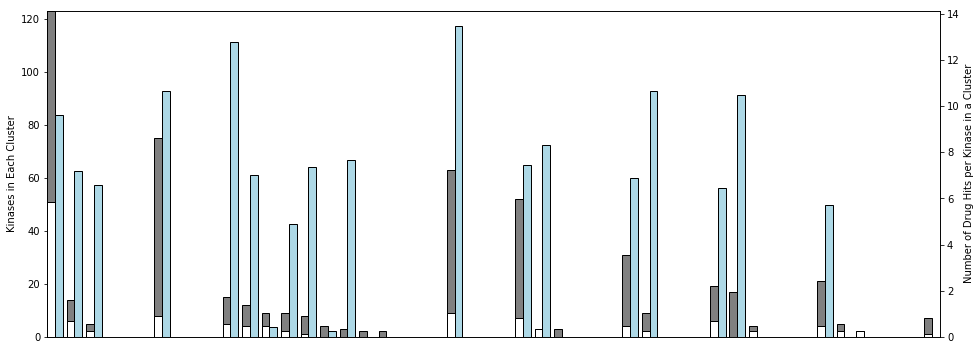

In [33]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(16,6))

ax.bar(sub_grouping['location']-0.4, 
       sub_grouping['understudied'],
       width=0.4,
       color='w',
       align='center',
       edgecolor='k')

ax.bar(sub_grouping['location']-0.4, 
       sub_grouping['count']-sub_grouping['understudied'],
       bottom=sub_grouping['understudied'],
       width=0.4,
       color='gray',
       align='center',
       edgecolor='k')

plt.ylabel('Kinases in Each Cluster')

## make the second plot

ax2 = ax.twinx()
ax2.bar(sub_grouping['location'], 
       sub_grouping['normalized_target_count'],
       width=0.4,
       color='lightblue',
       align='center',
       edgecolor='k')

plt.ylabel('Number of Drug Hits per Kinase in a Cluster')

ax.autoscale(tight=True)

#ax2.set_yscale('log')


#ax.set_xticklabels([])
#ax.set_yticklabels([])
#ax.axes.get_yaxis().set_ticks([])
ax.axes.get_xaxis().set_ticks([])

plt.xlabel('Subcluster Number')

plt.show()

### Precision and 


In [34]:
drug_list = sorted(list(dat['Drug'].unique()))
num_drugs = len(drug_list)

dat.head()

,Drug,Gene Name,R2,Target Classification
0,Abemaciclib,AAK1,0.985386,High confidence
1,Abemaciclib,ADCK1,0.983520,High confidence
2,Abemaciclib,BMP2K,0.937247,High confidence
3,Abemaciclib,CAMK2D,0.992088,High confidence
4,Abemaciclib,CAMK2G,0.939239,High confidence


In [35]:
len(set(dat['Gene Name']))

531

In [61]:
len(set(hgnc_mapper.keys()) & set(dat['Gene Name']))

529

In [42]:
from copy import copy

# old temp dat before hgnc
# temp_dat = copy(dat[dat['Gene Name'].isin(list(set(alias[best_col]) & set(genes_targeted)))])
#names = temp_dat['Gene Name'].apply(lambda x: MS_to_RNAseq_mapper[x])

# after hgnc
temp_dat = copy(dat[dat['Gene Name'].isin(hgnc_mapper.keys())])
names = temp_dat['Gene Name'].apply(lambda x: hgnc_mapper[x])

temp_dat.drop('Gene Name', axis=1, inplace=True)
temp_dat['Gene Name'] = names

#print(sorted(list(set(names))))
temp_dat.head()

,Drug,R2,Target Classification,Gene Name
0,Abemaciclib,0.985386,High confidence,AAK1
1,Abemaciclib,0.983520,High confidence,ADCK1
2,Abemaciclib,0.937247,High confidence,BMP2K
3,Abemaciclib,0.992088,High confidence,CAMK2D
4,Abemaciclib,0.939239,High confidence,CAMK2G


In [44]:
# filter to louv
louv['names'] = louv['names'].apply(lambda x: hgnc_mapper[x])

temp_dat = temp_dat[temp_dat['Gene Name'].isin(louv['names'])]

In [45]:
gene_to_super_map = louv.set_index('names')['cluster_super'].to_dict()
gene_to_sub_map = louv.set_index('names')['cluster_sub'].to_dict()

temp_dat['cluster_super'] = temp_dat['Gene Name'].apply(lambda x: gene_to_super_map.get(x))
temp_dat['cluster_sub'] = temp_dat['Gene Name'].apply(lambda x: gene_to_sub_map.get(x))

In [46]:
temp_dat[temp_dat.isna().any(axis=1)]

,Drug,R2,Target Classification,Gene Name,cluster_super,cluster_sub
1686,Dabrafenib,NaN,Low confidence,CDK18,2,2


In [47]:
temp_dat = temp_dat.dropna(axis=0)

In [48]:
temp_dat.head()

,Drug,R2,Target Classification,Gene Name,cluster_super,cluster_sub
0,Abemaciclib,0.985386,High confidence,AAK1,2,2
1,Abemaciclib,0.983520,High confidence,ADCK1,7,3
2,Abemaciclib,0.937247,High confidence,BMP2K,2,2
3,Abemaciclib,0.992088,High confidence,CAMK2D,6,6
4,Abemaciclib,0.939239,High confidence,CAMK2G,6,6


In [49]:
super_drug_hits = temp_dat.groupby('cluster_super')['Drug'].unique()
sub_drug_hits = temp_dat.groupby('cluster_sub')['Drug'].unique()

In [50]:
sub_drug_hits

cluster_sub
1     [Abemaciclib, ACTB-1003, AEW-541, Alvocidib, A...
2     [Abemaciclib, ACTB-1003, AEE-788, AEW-541, Afa...
3     [Abemaciclib, AC-480, ACTB-1003, AEE-788, AEW-...
4     [AMG-900, AT-9283, AZD-1480, AZD-4547, AZD-776...
5     [AEE-788, AEW-541, ASP-3026, AT-9283, AZD-7762...
6     [Abemaciclib, Afatinib, Alvocidib, AMG-900, AS...
7     [AEE-788, Alectinib, Alisertib, ASP-3026, AT-9...
8     [ACTB-1003, AEE-788, Alvocidib, AMG-900, Apito...
9     [AEW-541, Alisertib, ASP-3026, AT-9283, Axitin...
10    [Abemaciclib, AT-9283, Cyc-116, Danusertib, De...
11    [Abemaciclib, AC-480, ACTB-1003, AEE-788, AEW-...
13    [ACTB-1003, AEW-541, AMG-900, ASP-3026, AT-928...
14    [Abemaciclib, Afatinib, Alectinib, Alvocidib, ...
15    [ACTB-1003, Alvocidib, AMG-900, AT-7519, AT-92...
17    [Abemaciclib, ACTB-1003, AEE-788, AEW-541, Ale...
18         [AZD-2014, CP-547632, Dasatinib, Golvatinib]
19    [Alectinib, Baricitinib, Canertinib, CC-401, C...
23                                  

In [51]:
super_drug_number_clusters_hit = (temp_dat.groupby('Drug')['cluster_super'].unique().apply(lambda x: len(x))/8.0).to_dict()
sub_drug_number_clusters_hit =  (temp_dat.groupby('Drug')['cluster_sub'].unique().apply(lambda x: len(x))/36.0).to_dict()

In [52]:
set(drug_list) - set(super_drug_number_clusters_hit.keys())

{'AXL-1717',
 'AZD-6482',
 'AZD-8055',
 'AZD-8186',
 'Amuvatinib',
 'BMS-911543',
 'Copanlisib',
 'SGX-523',
 'Volitinib'}

In [53]:
len(super_drug_number_clusters_hit)

220

In [54]:
len(sub_drug_number_clusters_hit)

220